In [1]:
import pandas as pd

# Pré-Processamento
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Fluxo de Pré-Processamento + Extração de Features
from pre_processing import preprocess_nlp

# Pipeline de modelos a serem executados
from classification import classification_models

# Modelos que serão executados
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

## Leitura da base

In [2]:
# df = pd.read_csv('../dataset/Emocoes.csv', sep = ";", encoding = 'iso8859-1')
df = pd.read_csv('../dataset/NoThemeTweets.csv', sep = ",")

In [3]:
df = df.sample(frac=0.10, replace=True, random_state=20)

In [4]:
df.shape

(78581, 5)

In [5]:
df['sentiment'].value_counts()

Negativo    52257
Positivo    26324
Name: sentiment, dtype: int64

In [6]:
# # Renomeando campos e apagando
# df.rename(columns = dict(zip(df.columns, [i.replace('[', '').replace(']', '') for i in df.columns])), inplace = True) 
# df.drop(['Unnamed: 15', 'Unnamed: 16','Unnamed: 17','Unnamed: 18',	'Unnamed: 19',	'Unnamed: 20'], axis = 1, inplace = True)

In [7]:
# # Ignorando lixo em hashtagsearch
# df = df[df['hashtagsearch'].map(df['hashtagsearch'].value_counts()) > 4]

In [8]:
# # Tratando texto em hashtagsearch
# df['hashtagsearch'] = df['hashtagsearch'].apply(lambda x: x.replace('#', '').replace(',','').replace('"', ''))

In [9]:
# # Conferindo tratamento
# df['hashtagsearch'].value_counts()

## Chamando pré-processamento

In [10]:
# Instânciando classe para tratamento dos textos
prepro_imdb = preprocess_nlp(df['tweet_text'], lemma=True, wordcloud=True, numeric='tfidf', ngram=3)

In [11]:
stops = ['mim', 'eh', 'vamo', 'deu', 'tb', 'pro', 'oi', 'oq']

for i in stops:
    prepro_imdb.add_stopword(i)

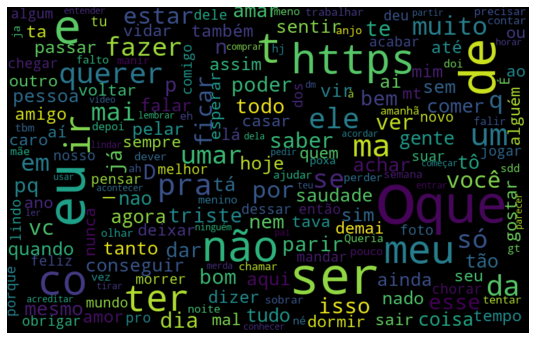

CPU times: user 6min 26s, sys: 1.2 s, total: 6min 27s
Wall time: 6min 27s


In [12]:
%%time
# Pegando matriz e textos tratados
sparse_matrix_imdb, transform_Texts = prepro_imdb.preprocess()

In [13]:
le = preprocessing.LabelEncoder()
le.fit(df['sentiment'].unique())
df['sentiment'] = le.transform(df['sentiment'])

In [14]:
# Train and valid
# X_train, X_valid, y_train, y_valid = train_test_split(sparse_matrix_imdb, df['sentiment'], test_size=0.3)

## Chamando os modelos

In [15]:
models = [
    ("RandomForest", RandomForestClassifier()),
    ("LogisticRegression", LogisticRegression(max_iter = 10000)),
    ("SVC", SVC()),
    ("KNeighborsClassifier", KNeighborsClassifier()),
    ("MultinomialNB", MultinomialNB())
]

In [16]:
mod = classification_models(X_train, y_train, X_valid, y_valid, models)

In [17]:
%%time
results = mod.apply_model()

CPU times: user 4min 35s, sys: 19.4 s, total: 4min 54s
Wall time: 4min 54s


In [18]:
results

{'RandomForest': {'acc': 0.7008271474019088,
  'Precisão': 0.6057365094798249,
  'Recall': 0.31452732550801465,
  'F1_score': 0.6065954412138154,
  'roc_auc_score': 0.6054491981488451},
 'LogisticRegression': {'acc': 0.6923011664899258,
  'Precisão': 0.620889049512107,
  'Recall': 0.2168370566704531,
  'F1_score': 0.5612320638427903,
  'roc_auc_score': 0.5749084337786203},
 'SVC': {'acc': 0.7011664899257688,
  'Precisão': 0.6439344262295082,
  'Recall': 0.24788590180487188,
  'F1_score': 0.5816162870312632,
  'roc_auc_score': 0.5892508987685233},
 'KNeighborsClassifier': {'acc': 0.6469141039236479,
  'Precisão': 0.47304745261459874,
  'Recall': 0.44414994320333206,
  'F1_score': 0.5981418247930032,
  'roc_auc_score': 0.5968513580059595},
 'MultinomialNB': {'acc': 0.6807211028632025,
  'Precisão': 0.7004048582995951,
  'Recall': 0.08734065379275527,
  'F1_score': 0.47923636785265267,
  'roc_auc_score': 0.5342146662779264}}

# Chamando FastText